# Visualisation and basic processing

In [1]:
import turicreate as tc

In [2]:
%ls processed-data

Daily-Brent-Index.csv  rsp-data.csv           sector-wise-gdp.csv


## We load the data into SFrames

In [4]:
sf_brent = tc.SFrame('./processed-data/Daily-Brent-Index.csv')
sf_rsp = tc.SFrame('./processed-data/rsp-data.csv')
sf_gdp = tc.SFrame('./processed-data/sector-wise-gdp.csv')

Finished parsing file /Users/SaharshShukla/My Documents/Non Core/Econometrics/Oil-Price-Analysis-Data/processed-data/Daily-Brent-Index.csv

Parsing completed. Parsed 100 lines in 0.008853 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/SaharshShukla/My Documents/Non Core/Econometrics/Oil-Price-Analysis-Data/processed-data/Daily-Brent-Index.csv

Parsing completed. Parsed 8554 lines in 0.008288 secs.

Finished parsing file /Users/SaharshShukla/My Documents/Non Core/Econometrics/Oil-Price-Analysis-Data/processed-data/rsp-data.csv

Parsing completed. Parsed 56 lines in 0.006405 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,int,float,float,int,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/SaharshShukla/My Documents/Non Core/Econometrics/Oil-Price-Analysis-Data/processed-data/rsp-data.csv

Parsing completed. Parsed 56 lines in 0.006283 secs.

Finished parsing file /Users/SaharshShukla/My Documents/Non Core/Econometrics/Oil-Price-Analysis-Data/processed-data/sector-wise-gdp.csv

Parsing completed. Parsed 38 lines in 0.005928 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,int,int,int,int,int,int,int,int,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/SaharshShukla/My Documents/Non Core/Econometrics/Oil-Price-Analysis-Data/processed-data/sector-wise-gdp.csv

Parsing completed. Parsed 38 lines in 0.007913 secs.

### Basic Visualisations

In [5]:
sf_rsp.head()

Region,Date,Urban EstimatedUnemployment Rate (%) ...,Urban Estimated Employed,Urban Estimated LabourParticipation Rate (%) ...,Rural EstimatedUnemployment Rate (%) ...
Delhi,31/05/19,12.31,5756475,44.17,12.56
Delhi,30/06/19,12.76,5550172,42.71,9.33
Delhi,31/07/19,14.68,5393091,42.34,11.07
Delhi,31/08/19,13.52,5552510,42.9,17.18
Delhi,30/09/19,20.59,5642253,47.36,12.5
Delhi,31/10/19,12.41,6030363,45.78,15.84
Delhi,30/11/19,16.11,5439600,43.02,11.11
Delhi,31/12/19,11.07,5718337,42.56,16.97
Delhi,31/01/20,22.45,5647493,48.09,13.48
Delhi,29/02/20,14.86,5708807,44.18,13.81


In [6]:
sf_rsp = sf_rsp.remove_column('X10')

In [7]:
import matplotlib.pyplot as plt

In [8]:
sf_rsp_DL = sf_rsp[sf_rsp['Region'] == 'Delhi']
sf_rsp_WB = sf_rsp[sf_rsp['Region'] == 'West Bengal']
sf_rsp_MH = sf_rsp[sf_rsp['Region'] == 'Maharashtra']
sf_rsp_TN = sf_rsp[sf_rsp['Region'] == 'Tamil Nadu']

In [9]:
import datetime as dt
sf_rsp_DL['Date']= sf_rsp_DL['Date'].str_to_datetime("%d/%m/%y")
sf_rsp_MH['Date']= sf_rsp_MH['Date'].str_to_datetime("%d/%m/%y")
sf_rsp_TN['Date']= sf_rsp_TN['Date'].str_to_datetime("%d/%m/%y")
sf_rsp_WB['Date']= sf_rsp_WB['Date'].str_to_datetime("%d/%m/%y")

In [10]:
def plot_cust(sf):
    fig, ax = plt.subplots()
    ax.plot(sf['Date'], sf['Oil RSP'], '-b', label='Oil Prices')
    ax.plot(sf['Date'], sf['Urban Estimated Unemployment Rate (%)'], '-g', label='Urban Unemployment')
    ax.plot(sf['Date'], sf['Rural Estimated Unemployment Rate (%)'], '-r', label='Rural Unemployment')
    #ax.axis('equal')
    leg = ax.legend();

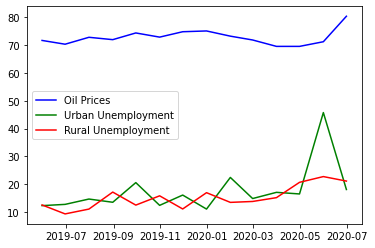

In [11]:
plot_cust(sf_rsp_DL)

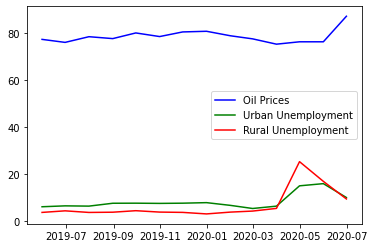

In [12]:
plot_cust(sf_rsp_MH)

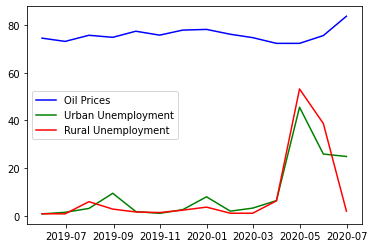

In [13]:
plot_cust(sf_rsp_TN)

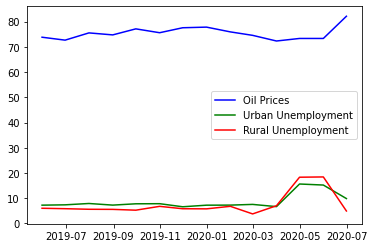

In [14]:
plot_cust(sf_rsp_WB)

In [15]:
import seaborn as sns
import pandas as pd

In [16]:
df_rsp_DL = sf_rsp_DL.to_dataframe()
df_rsp_MH = sf_rsp_MH.to_dataframe()
df_rsp_TN = sf_rsp_TN.to_dataframe()
df_rsp_WB = sf_rsp_WB.to_dataframe()

In [173]:
df_rsp_DL.corr();

In [18]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

In [19]:
def getHeatMap(df):
    columns = df.columns
    corr = df[columns].corr()
    corr = pd.melt(corr.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        x=corr['x'],
        y=corr['y'],
        size=corr['value'].abs()
    )

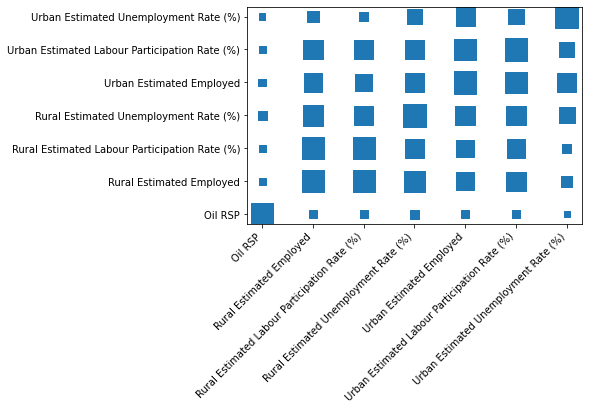

In [20]:
getHeatMap(df_rsp_DL)

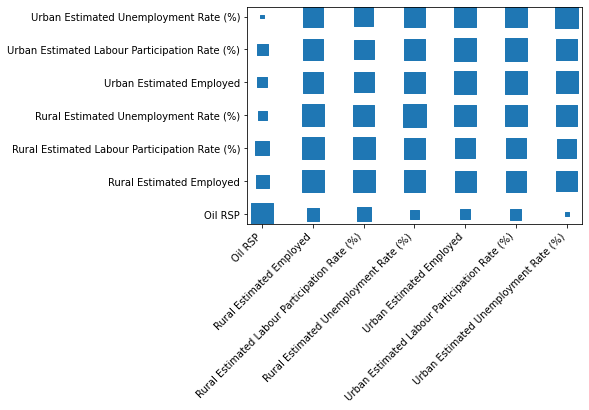

In [21]:
getHeatMap(df_rsp_MH)

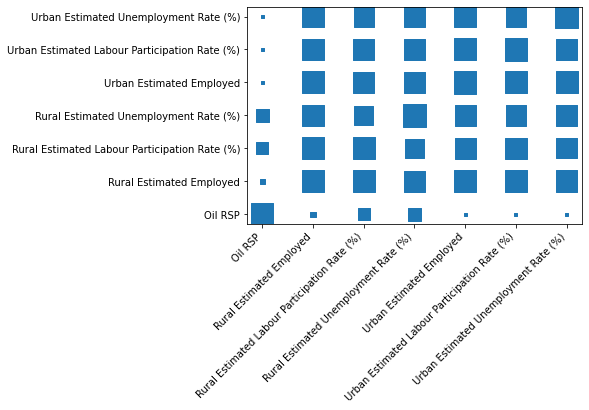

In [22]:
getHeatMap(df_rsp_TN)

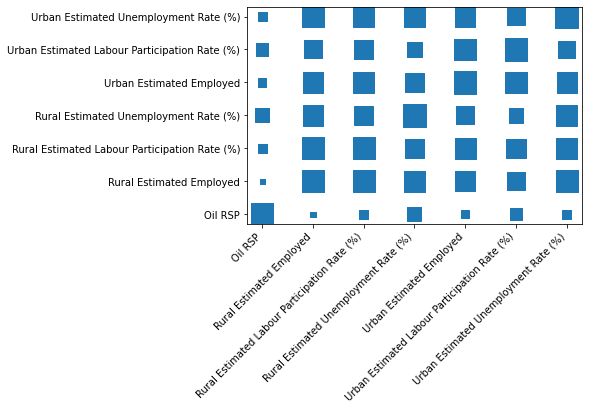

In [23]:
getHeatMap(df_rsp_WB)

In [180]:
def getCorrelationPlot(data):
    fig, ax = plt.subplots(figsize=(15,15))
    corr = data.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

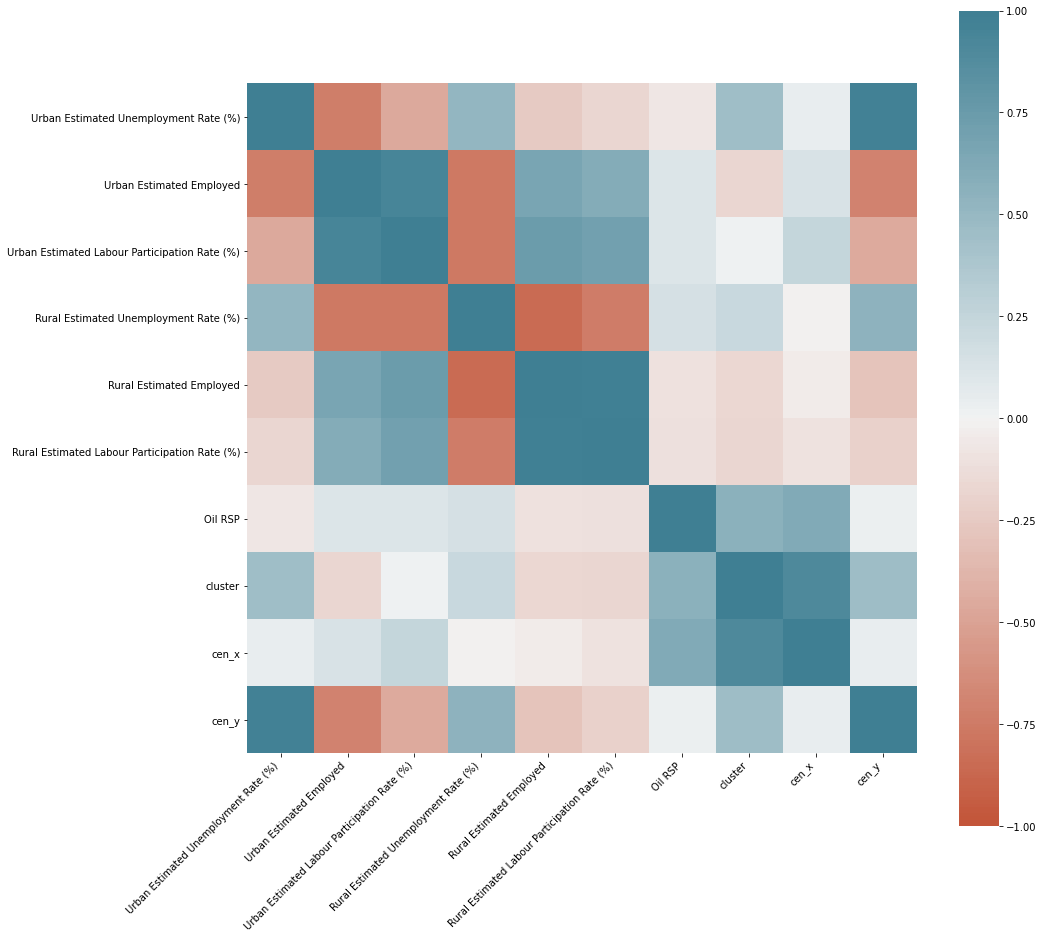

In [181]:
getCorrelationPlot(df_rsp_DL)

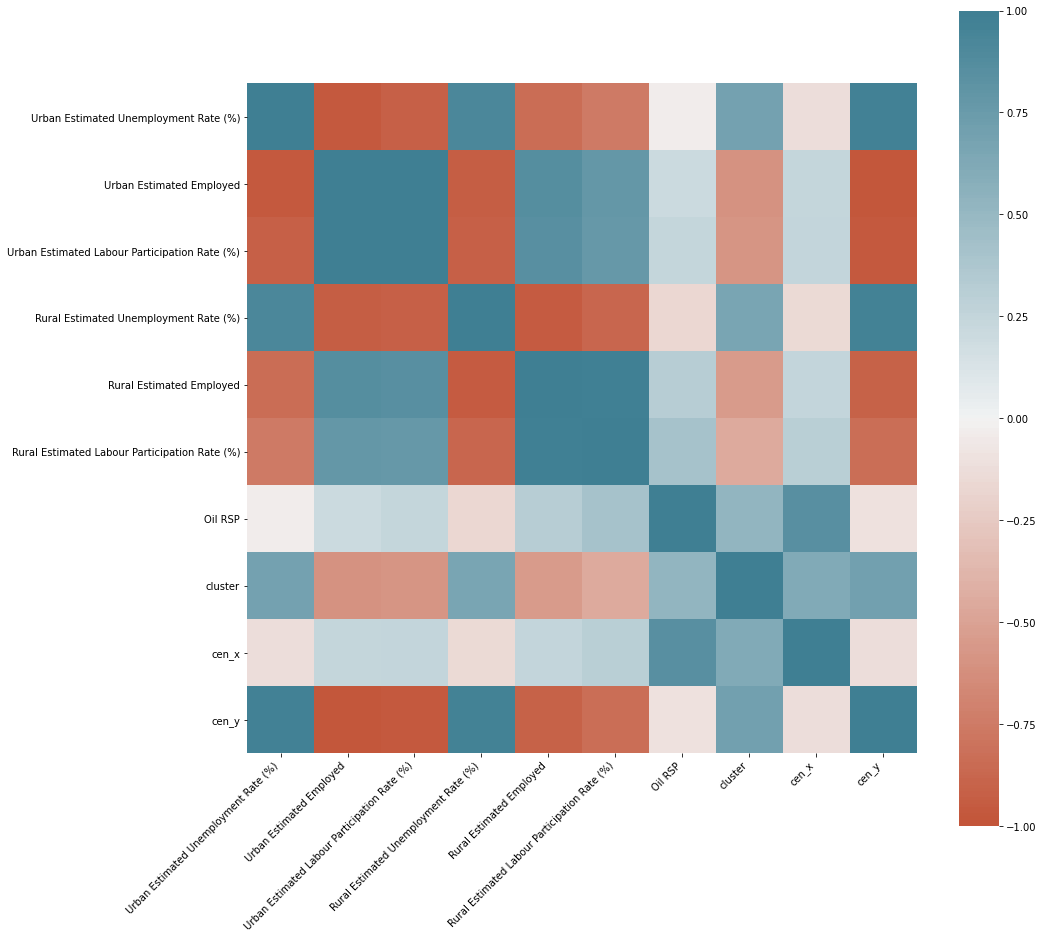

In [182]:
getCorrelationPlot(df_rsp_MH)

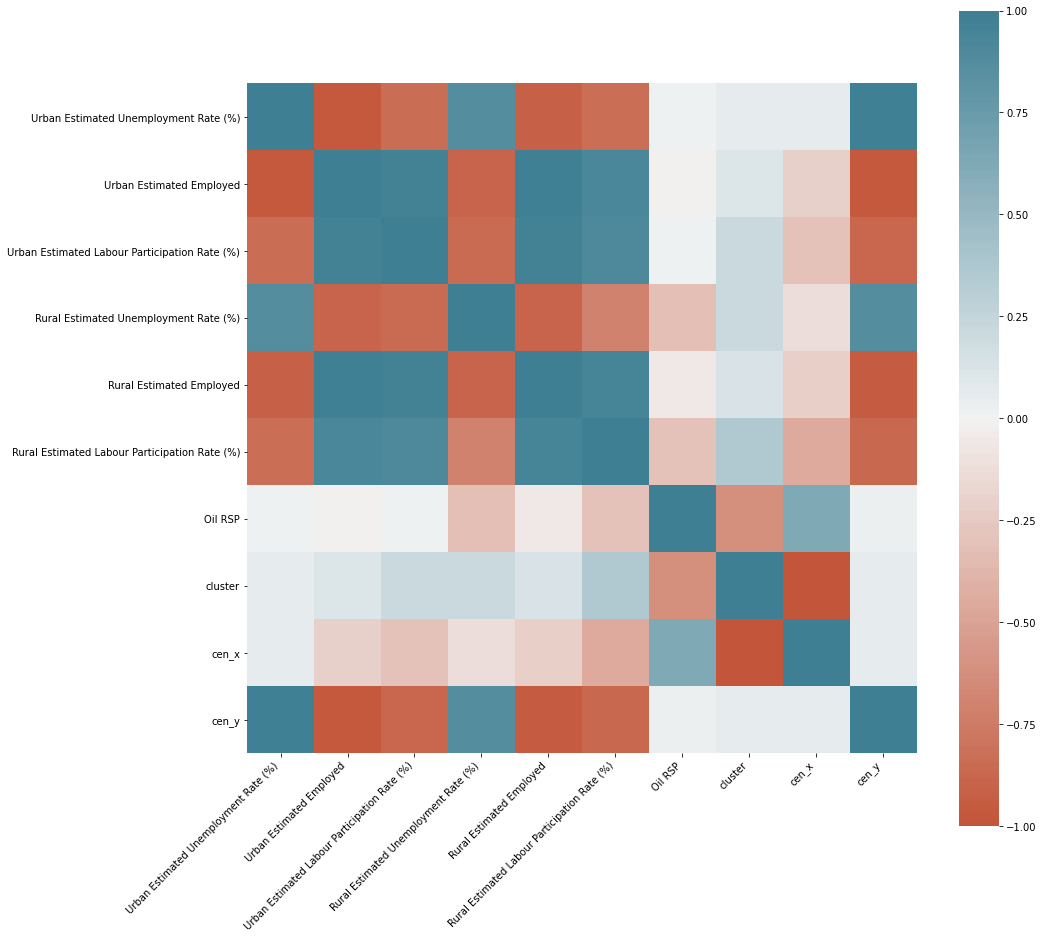

In [183]:
getCorrelationPlot(df_rsp_TN)

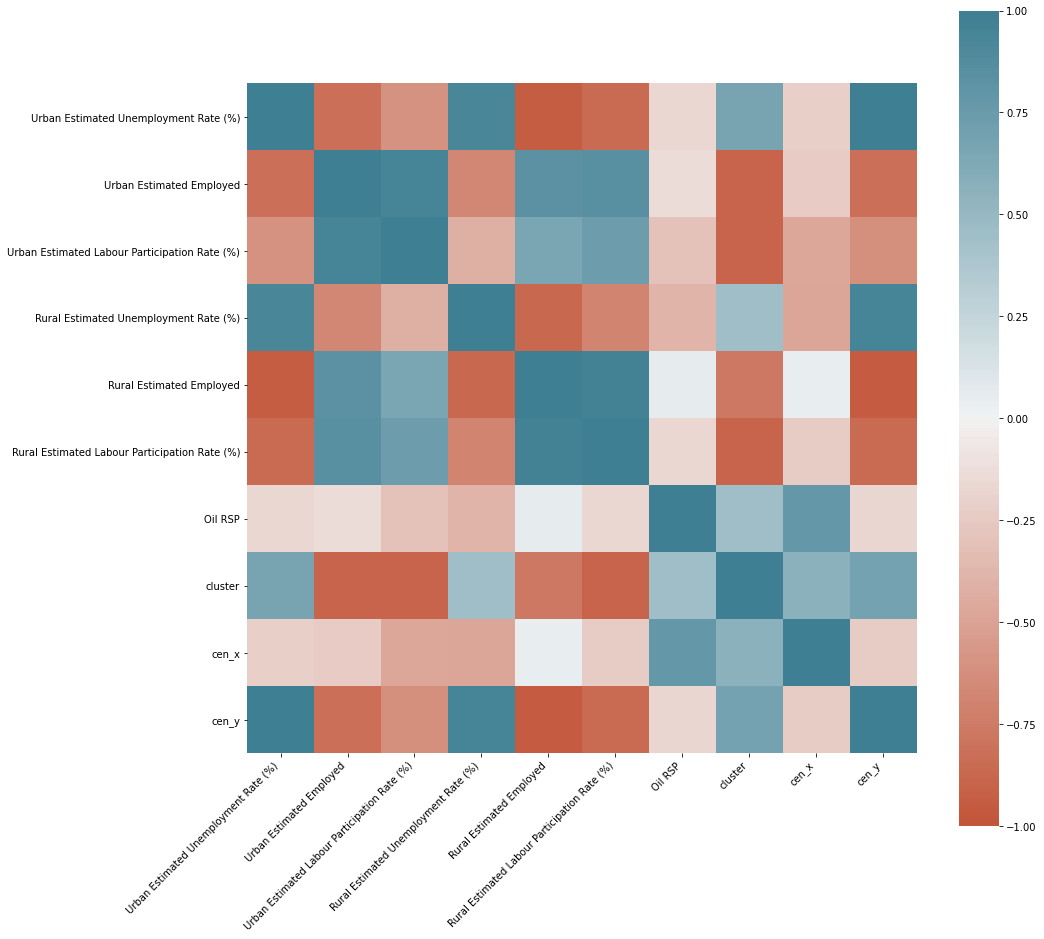

In [184]:
getCorrelationPlot(df_rsp_WB)

In [29]:
from sklearn.cluster import KMeans
import numpy as np
# k means
def get_Kmeans(df, col1, col2):
    kmeans = KMeans(n_clusters=3, random_state=0)
    df['cluster'] = kmeans.fit_predict(df[[col1, col2]])
    # get centroids
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    ## add to df
    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
    # define and map colors
    colors = ['#DF2020', '#81DF20', '#2095DF']
    df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
    plt.scatter(df[col1], df[col2], c=df.c, alpha = 0.6, s=10)
    return df

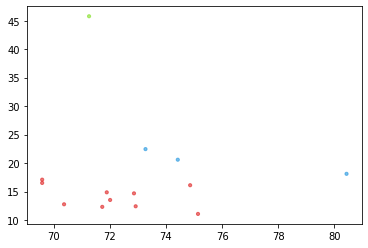

In [30]:
df_rsp_DL = get_Kmeans(df_rsp_DL, 'Oil RSP', 'Urban Estimated Unemployment Rate (%)')

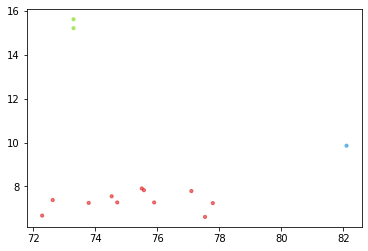

In [31]:
df_rsp_WB = get_Kmeans(df_rsp_WB, 'Oil RSP', 'Urban Estimated Unemployment Rate (%)')

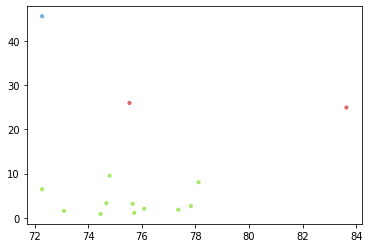

In [32]:
df_rsp_TN = get_Kmeans(df_rsp_TN, 'Oil RSP', 'Urban Estimated Unemployment Rate (%)')

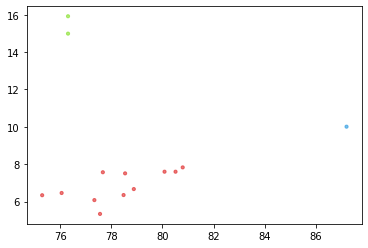

In [33]:
df_rsp_MH = get_Kmeans(df_rsp_MH, 'Oil RSP', 'Urban Estimated Unemployment Rate (%)')

In [61]:
from matplotlib.lines import Line2D
def get_Centroid_plot(df, col1, col2):
    kmeans = KMeans(n_clusters=3, random_state=0)
    df['cluster'] = kmeans.fit_predict(df[[col1, col2]])
    # get centroids
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    ## add to df
    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
    # define and map colors
    colors = ['#DF2020', '#81DF20', '#2095DF']
    df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
    fig, ax = plt.subplots(1, figsize=(8,8))
    # plot data
    plt.scatter(df[col1], df[col2], c=df.c, alpha = 0.6, s=10)
    # plot centroids
    plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    # plot Attack mean
    plt.plot([df[col1].mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
    plt.xlim(0,200)
    # plot Defense mean
    plt.plot([0,200], [df[col2].mean()]*2, color='black', lw=0.5, linestyle='--')
    plt.ylim(0,200)
    # create a list of legend elemntes
    ## average line
    legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
    ## markers / records
    cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
    ## centroids
    cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
    # add all elements to the same list
    legend_elements.extend(cluster_leg)
    legend_elements.extend(cent_leg)
    # plot legend
    plt.legend(handles=legend_elements, loc='upper right', ncol=2)
    # title and labels
    plt.title('Stats\n', loc='left', fontsize=22)
    plt.xlabel(col1)
    plt.ylabel(col2)

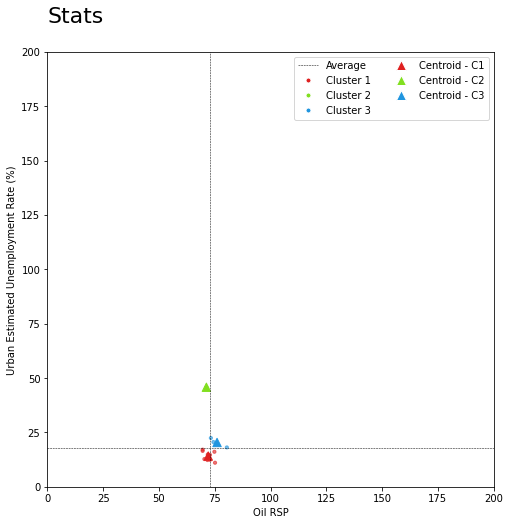

In [62]:
get_Centroid_plot(df_rsp_DL,'Oil RSP','Urban Estimated Unemployment Rate (%)')

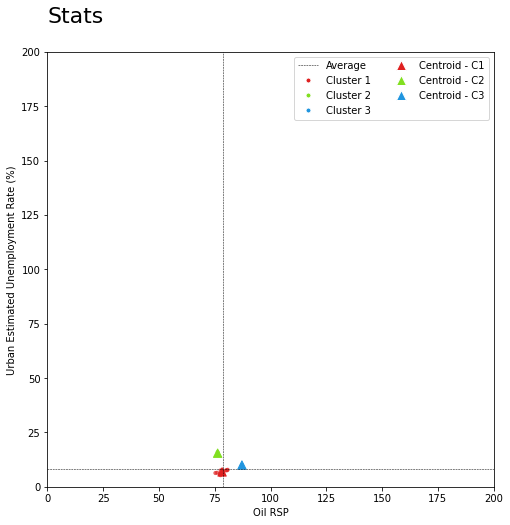

In [63]:
get_Centroid_plot(df_rsp_MH,'Oil RSP','Urban Estimated Unemployment Rate (%)')

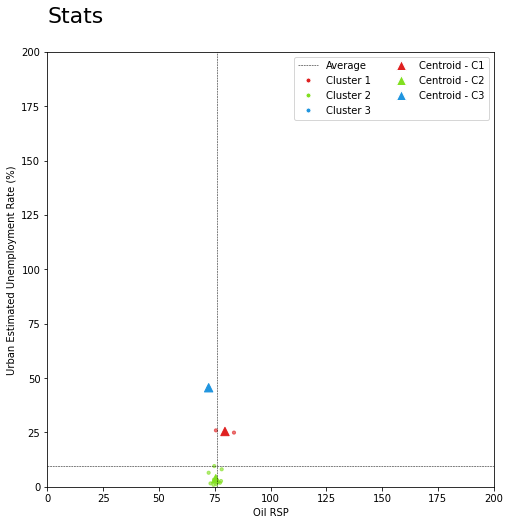

In [64]:
get_Centroid_plot(df_rsp_TN,'Oil RSP','Urban Estimated Unemployment Rate (%)')

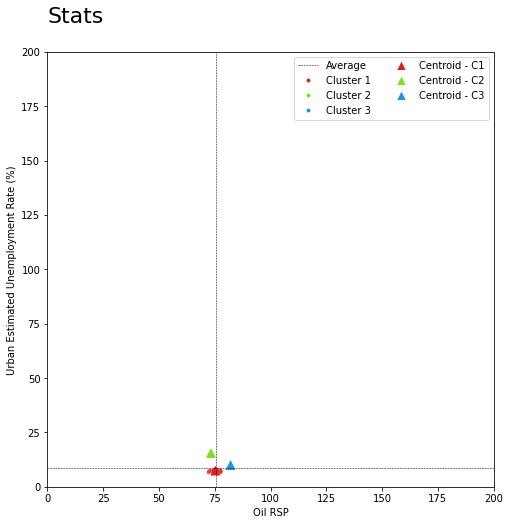

In [65]:
get_Centroid_plot(df_rsp_WB,'Oil RSP','Urban Estimated Unemployment Rate (%)')

In [68]:
sf_gdp_interest = sf_gdp[sf_gdp['Year/ Industry'] == '2019-20']

In [69]:
sf_gdp_interest

Columns:
	X1	int
	Year/ Industry	str
	Quarter	str
	Agriculture, Forestry and Fishing	int
	Mining & Quarrying	int
	Manufacturing	int
	Electricity, Gas, Water Supply & Other Utility	int
	Construction	int
	Trade, Hotels, Transport, Communication and Services Related to Broadcasting	int
	Financial, Real Estate and Professional Services	int
	Public Administration, Defence and Other Services	int
	Total Gross Value Added at Basic Price	int
	Date	str

Rows: Unknown

Data:
+----+----------------+---------+-------------------------------+--------------------+
| X1 | Year/ Industry | Quarter | Agriculture, Forestry and ... | Mining & Quarrying |
+----+----------------+---------+-------------------------------+--------------------+
| 32 |    2019-20     |    Q1   |             712222            |       104945       |
| 33 |    2019-20     |    Q2   |             608227            |       75826        |
| 34 |    2019-20     |    Q3   |            1053034            |       92789        |
| 35 |    2019-20     |    Q4   |             883959            |       119543       |
+----+----------------+---------+-------------------------------+--------------------+
+---------------+-------------------------------+--------------+-------------------------------+
| Manufacturing | Electricity, Gas, Water Su... | Construction | Trade, Hotels, Transport, ... |
+---------------+-------------------------------+--------------+-------------------------------+
|     694993    |             124751            |    350920    |             806915            |
|     687906    |             122547            |    325815    |             783108            |
|     664294    |             115188            |    349232    |             821438            |
|     728394    |             124030            |    358928    |             905193            |
+---------------+-------------------------------+--------------+-------------------------------+
+-------------------------------+-------------------------------+-------------------------------+
| Financial, Real Estate and... | Public Administration, Def... | Total Gross Value Added at... |
+-------------------------------+-------------------------------+-------------------------------+
|            1056866            |             637682            |            4489292            |
|            1138695            |             723713            |            4465838            |
|             818382            |             760995            |            4675351            |
|             828581            |             764128            |            4712757            |
+-------------------------------+-------------------------------+-------------------------------+
+------------+
|    Date    |
+------------+
| 2019-06-30 |
| 2019-09-30 |
| 2019-12-31 |
| 2020-03-31 |
+------------+
[? rows x 13 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [70]:
df_rsp_DL.groupby('Date', freq='Q'), axis=1).mean()

,Region,Date,Urban Estimated Unemployment Rate (%),Urban Estimated Employed,Urban Estimated Labour Participation Rate (%),Rural Estimated Unemployment Rate (%),Rural Estimated Employed,Rural Estimated Labour Participation Rate (%),Oil RSP,cluster,cen_x,cen_y,c
0,Delhi,2019-05-31,12.31,5756475,44.17,12.56,169487,42.33,71.73,0,72.096,14.132000,#DF2020
1,Delhi,2019-06-30,12.76,5550172,42.71,9.33,149076,35.74,70.37,0,72.096,14.132000,#DF2020
2,Delhi,2019-07-31,14.68,5393091,42.34,11.07,166605,40.53,72.86,0,72.096,14.132000,#DF2020
3,Delhi,2019-08-31,13.52,5552510,42.90,17.18,135407,35.21,72.01,0,72.096,14.132000,#DF2020
4,Delhi,2019-09-30,20.59,5642253,47.36,12.50,166056,40.68,74.42,2,76.040,20.383333,#2095DF
5,Delhi,2019-10-31,12.41,6030363,45.78,15.84,149511,37.90,72.92,0,72.096,14.132000,#DF2020
6,Delhi,2019-11-30,16.11,5439600,43.02,11.11,178768,42.71,74.86,0,72.096,14.132000,#DF2020
7,Delhi,2019-12-31,11.07,5718337,42.56,16.97,145671,37.08,75.14,0,72.096,14.132000,#DF2020
8,Delhi,2020-01-31,22.45,5647493,48.09,13.48,157791,38.36,73.27,2,76.040,20.383333,#2095DF
9,Delhi,2020-02-29,14.86,5708807,44.18,13.81,147500,35.84,71.89,0,72.096,14.132000,#DF2020


In [136]:
def cleanData(df):
    df = df.groupby(pd.PeriodIndex(df['Date'], freq='Q')).mean()
    df = df.reset_index()
    df = df.drop(index=[3,4])
    return df

In [168]:
df_gdp_interest = sf_gdp_interest.to_dataframe()
df_gdp_interest = df_gdp_interest.drop(columns='X1')
df_gdp_interest['Date'] = pd.PeriodIndex(df_gdp_interest['Date'], freq='Q')
df_gdp_interest
df_gdp_interest = df_gdp_interest.drop(index=[3])

In [139]:
df_rsp_DL_q = cleanData(df_rsp_DL)
df_rsp_MH_q = cleanData(df_rsp_MH)
df_rsp_WB_q = cleanData(df_rsp_WB)
df_rsp_TN_q = cleanData(df_rsp_TN)

In [ ]:
pd.merge(df_gdp_interest, df_rsp_DL_q, on)

In [150]:
df_gdp_interest['Index'] = pd.PeriodIndex(df_gdp_interest['Date'], freq='Q')

In [169]:
df_gdp_interest

,Year/ Industry,Quarter,"Agriculture, Forestry and Fishing",Mining & Quarrying,Manufacturing,"Electricity, Gas, Water Supply & Other Utility",Construction,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting","Financial, Real Estate and Professional Services","Public Administration, Defence and Other Services",Total Gross Value Added at Basic Price,Date
0,2019-20,Q1,712222,104945,694993,124751,350920,806915,1056866,637682,4489292,2019Q2
1,2019-20,Q2,608227,75826,687906,122547,325815,783108,1138695,723713,4465838,2019Q3
2,2019-20,Q3,1053034,92789,664294,115188,349232,821438,818382,760995,4675351,2019Q4


In [165]:
df_gdp_rsp_unem_q = pd.merge(df_gdp_interest, df_rsp_DL_q, on=['Date'])

In [166]:
df_gdp_rsp_unem_q

,Year/ Industry,Quarter,"Agriculture, Forestry and Fishing",Mining & Quarrying,Manufacturing,"Electricity, Gas, Water Supply & Other Utility",Construction,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting","Financial, Real Estate and Professional Services","Public Administration, Defence and Other Services",...,Urban Estimated Unemployment Rate (%),Urban Estimated Employed,Urban Estimated Labour Participation Rate (%),Rural Estimated Unemployment Rate (%),Rural Estimated Employed,Rural Estimated Labour Participation Rate (%),Oil RSP,cluster,cen_x,cen_y
0,2019-20,Q1,712222,104945,694993,124751,350920,806915,1056866,637682,...,12.535000,5.653324e+06,43.440000,10.945000,159281.500000,39.035000,71.050000,0.000000,72.096000,14.132000
1,2019-20,Q2,608227,75826,687906,122547,325815,783108,1138695,723713,...,16.263333,5.529285e+06,44.200000,13.583333,156022.666667,38.806667,73.096667,0.666667,73.410667,16.215778
2,2019-20,Q3,1053034,92789,664294,115188,349232,821438,818382,760995,...,13.196667,5.729433e+06,43.786667,14.640000,157983.333333,39.230000,74.306667,0.000000,72.096000,14.132000


In [191]:
def Combine(df0,df1,df2,df3,df4):
    df0= df0.merge(df1,on=['Date'])
    df0= df0.merge(df2,on=['Date'])
    df0= df0.merge(df3,on=['Date'])
    df0= df0.merge(df4,on=['Date'])
    df0 = df0.drop(columns=['cluster_x', 'cen_x_x', 'cen_y_x','cluster_y', 'cen_x_y', 'cen_y_y','cluster_x', 'cen_x_x', 'cen_y_x','cluster_y', 'cen_x_y', 'cen_y_y'])
    return df0

In [192]:
df_gdp_rsp_unem_q = Combine(df_gdp_interest,df_rsp_DL_q,df_rsp_MH_q,df_rsp_TN_q,df_rsp_WB_q)

In [193]:
df_gdp_rsp_unem_q

,Year/ Industry,Quarter,"Agriculture, Forestry and Fishing",Mining & Quarrying,Manufacturing,"Electricity, Gas, Water Supply & Other Utility",Construction,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting","Financial, Real Estate and Professional Services","Public Administration, Defence and Other Services",...,Rural Estimated Employed_x,Rural Estimated Labour Participation Rate (%)_x,Oil RSP_x,Urban Estimated Unemployment Rate (%)_y,Urban Estimated Employed_y,Urban Estimated Labour Participation Rate (%)_y,Rural Estimated Unemployment Rate (%)_y,Rural Estimated Employed_y,Rural Estimated Labour Participation Rate (%)_y,Oil RSP_y
0,2019-20,Q1,712222,104945,694993,124751,350920,806915,1056866,637682,...,1.611000e+07,50.215000,73.780000,7.315000,1.095884e+07,44.94,5.935000,2.449817e+07,48.385000,73.210000
1,2019-20,Q2,608227,75826,687906,122547,325815,783108,1138695,723713,...,1.583843e+07,50.576667,75.940000,7.656667,1.113166e+07,45.63,5.486667,2.513114e+07,49.146667,75.770000
2,2019-20,Q3,1053034,92789,664294,115188,349232,821438,818382,760995,...,1.572534e+07,49.433333,77.223333,7.226667,1.088928e+07,44.22,6.133333,2.496321e+07,48.853333,76.966667


In [194]:
df_gdp_rsp_unem_q.corr()

,"Agriculture, Forestry and Fishing",Mining & Quarrying,Manufacturing,"Electricity, Gas, Water Supply & Other Utility",Construction,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting","Financial, Real Estate and Professional Services","Public Administration, Defence and Other Services",Total Gross Value Added at Basic Price,Urban Estimated Unemployment Rate (%)_x,...,Rural Estimated Employed_x,Rural Estimated Labour Participation Rate (%)_x,Oil RSP_x,Urban Estimated Unemployment Rate (%)_y,Urban Estimated Employed_y,Urban Estimated Labour Participation Rate (%)_y,Rural Estimated Unemployment Rate (%)_y,Rural Estimated Employed_y,Rural Estimated Labour Participation Rate (%)_y,Oil RSP_y
"Agriculture, Forestry and Fishing",1.000000,0.314951,-0.901462,-0.901636,0.635610,0.905959,-0.999735,0.562509,0.992440,-0.549607,...,-0.554947,-0.996022,0.625575,-0.810328,-0.858014,-0.959399,0.868900,0.039252,-0.093364,0.577185
Mining & Quarrying,0.314951,1.000000,0.126913,0.126514,0.932907,0.687152,-0.336711,-0.607552,0.196081,-0.966006,...,0.614768,-0.398270,-0.543435,-0.811368,-0.757719,-0.569862,0.743457,-0.936014,-0.974367,-0.593270
Manufacturing,-0.901462,0.126913,1.000000,1.000000,-0.238807,-0.633430,0.891261,-0.864964,-0.947773,0.133830,...,0.860352,0.859305,-0.901633,0.476835,0.551139,0.742772,-0.569021,-0.467909,-0.346804,-0.873788
"Electricity, Gas, Water Supply & Other Utility",-0.901636,0.126514,1.000000,1.000000,-0.239198,-0.633742,0.891443,-0.864762,-0.947902,0.134229,...,0.860147,0.859511,-0.901458,0.477189,0.551475,0.743042,-0.569353,-0.467552,-0.346425,-0.873592
Construction,0.635610,0.932907,-0.238807,-0.239198,1.000000,0.902679,-0.653210,-0.280755,0.536052,-0.994291,...,0.289494,-0.701873,-0.204673,-0.967433,-0.941887,-0.827551,0.934417,-0.746467,-0.827981,-0.263570
"Trade, Hotels, Transport, Communication and Services Related to Broadcasting",0.905959,0.687152,-0.633430,-0.633742,0.902679,1.000000,-0.915463,0.159575,0.847148,-0.851611,...,-0.150567,-0.940080,0.236451,-0.982206,-0.994777,-0.988587,0.996749,-0.387479,-0.506101,0.177179
"Financial, Real Estate and Professional Services",-0.999735,-0.336711,0.891261,0.891443,-0.653210,-0.915463,1.000000,-0.543331,-0.989352,0.568689,...,0.535654,0.997809,-0.607453,0.823600,0.869608,0.965636,-0.880063,-0.016243,0.116254,-0.558237
"Public Administration, Defence and Other Services",0.562509,-0.607552,-0.864964,-0.864762,-0.280755,0.159575,-0.543331,1.000000,0.659732,0.381562,...,-0.999958,-0.486598,0.996924,0.028664,-0.057978,-0.306471,0.079514,0.848233,0.770662,0.999841
Total Gross Value Added at Basic Price,0.992440,0.196081,-0.947773,-0.947902,0.536052,0.847148,-0.989352,0.659732,1.000000,-0.442916,...,-0.652853,-0.977555,0.716599,-0.732282,-0.788487,-0.917528,0.801579,0.161595,0.029540,0.673048
Urban Estimated Unemployment Rate (%)_x,-0.549607,-0.966006,0.133830,0.134229,-0.994291,-0.851611,0.568689,0.381562,-0.442916,1.000000,...,-0.389974,0.621863,0.307947,0.934900,0.900666,0.762926,-0.891077,0.813207,0.883088,0.364993


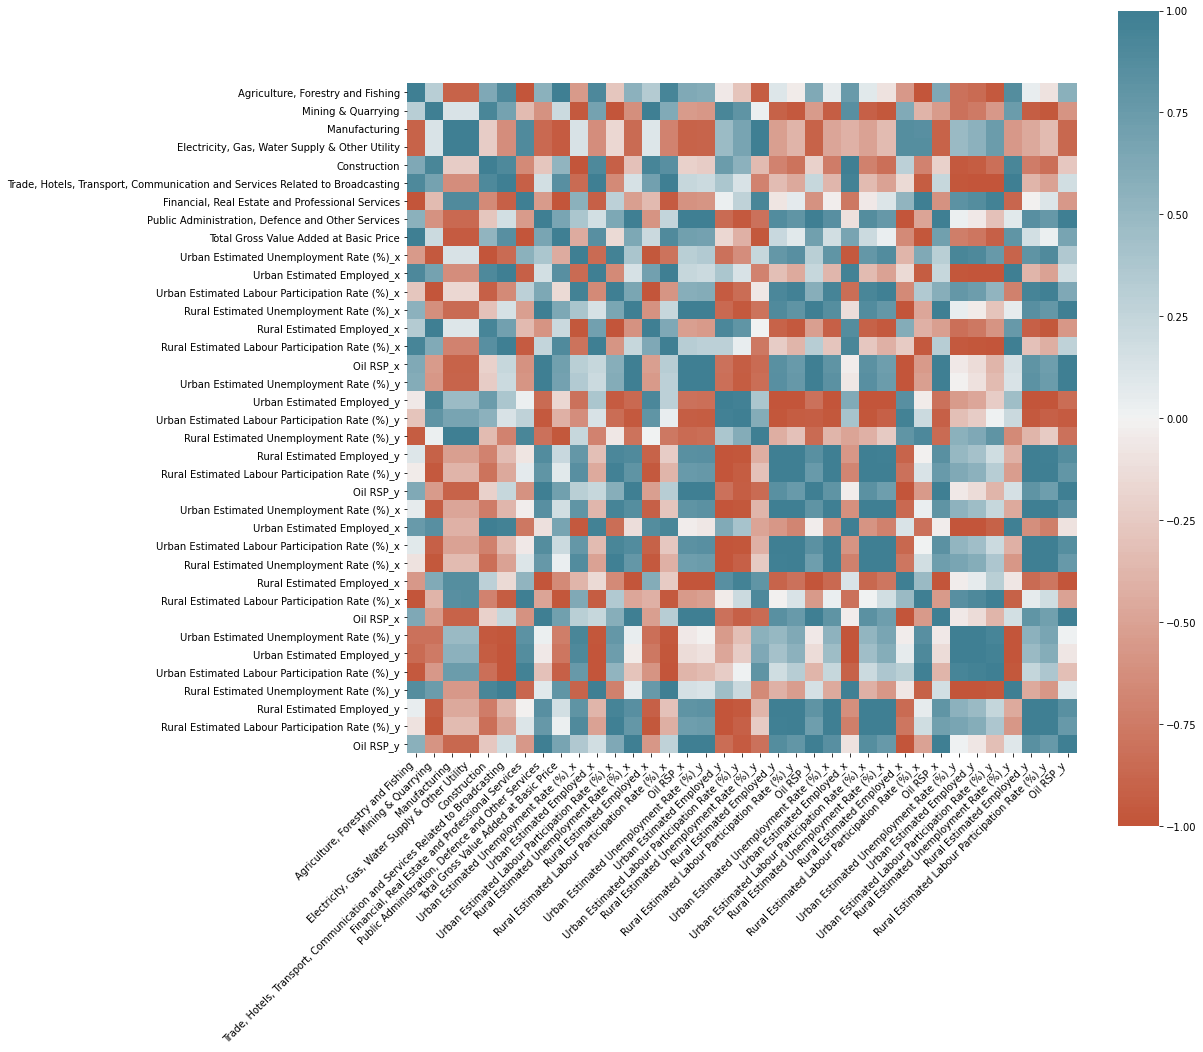

In [195]:
getCorrelationPlot(df_gdp_rsp_unem_q)

In [186]:
df_gdp_rsp_unem_q.columns

Index(['Year/ Industry', 'Quarter', 'Agriculture, Forestry and Fishing',
       'Mining & Quarrying', 'Manufacturing',
       'Electricity, Gas, Water Supply & Other Utility', 'Construction',
       'Trade, Hotels, Transport, Communication and Services Related to Broadcasting',
       'Financial, Real Estate and Professional Services',
       'Public Administration, Defence and Other Services',
       'Total Gross Value Added at Basic Price', 'Date',
       'Urban Estimated Unemployment Rate (%)_x', 'Urban Estimated Employed_x',
       'Urban Estimated Labour Participation Rate (%)_x',
       'Rural Estimated Unemployment Rate (%)_x', 'Rural Estimated Employed_x',
       'Rural Estimated Labour Participation Rate (%)_x', 'Oil RSP_x',
       'cluster_x', 'cen_x_x', 'cen_y_x',
       'Urban Estimated Unemployment Rate (%)_y', 'Urban Estimated Employed_y',
       'Urban Estimated Labour Participation Rate (%)_y',
       'Rural Estimated Unemployment Rate (%)_y', 'Rural Estimated Employed_

,Year/ Industry,Quarter,"Agriculture, Forestry and Fishing",Mining & Quarrying,Manufacturing,"Electricity, Gas, Water Supply & Other Utility",Construction,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting","Financial, Real Estate and Professional Services","Public Administration, Defence and Other Services",...,Rural Estimated Employed_x,Rural Estimated Labour Participation Rate (%)_x,Oil RSP_x,Urban Estimated Unemployment Rate (%)_y,Urban Estimated Employed_y,Urban Estimated Labour Participation Rate (%)_y,Rural Estimated Unemployment Rate (%)_y,Rural Estimated Employed_y,Rural Estimated Labour Participation Rate (%)_y,Oil RSP_y
0,2019-20,Q1,712222,104945,694993,124751,350920,806915,1056866,637682,...,1.611000e+07,50.215000,73.780000,7.315000,1.095884e+07,44.94,5.935000,2.449817e+07,48.385000,73.210000
1,2019-20,Q2,608227,75826,687906,122547,325815,783108,1138695,723713,...,1.583843e+07,50.576667,75.940000,7.656667,1.113166e+07,45.63,5.486667,2.513114e+07,49.146667,75.770000
2,2019-20,Q3,1053034,92789,664294,115188,349232,821438,818382,760995,...,1.572534e+07,49.433333,77.223333,7.226667,1.088928e+07,44.22,6.133333,2.496321e+07,48.853333,76.966667
